# Stock Market Predictor
**This document contains all phases of the AI project methodology(EDA, provisioning, modeling and evaluation). <br>**
**Main reason for this choice is because the data comes from the API and new data is added every single day which makes the product's predictions in real time. Separating phases in different notebooks will mean repeating same code which is not a good practice. I have also consulted with Bas Michielsen about that and he confirmed my approach.**

* <a href='#modeling'>Link to modeling phase</a> 

---

# **Exploratory Data Analysis**

**This phase has the purpose to get familiar with the stock market data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import DataFrame
key = '88D9DSE169BZ1ZID'
from alpha_vantage.techindicators import TechIndicators
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.fundamentaldata import FundamentalData
import requests

**We will be using the Alpha Vantage API for multiple reasons** 
> * real time data that will be updated everytime we work with the data
> * accurate data for a wide variety of different stocks
> * have built-in functions for different types of analysis

In [2]:
ts = TimeSeries(key, output_format = 'pandas')

In [3]:
prices, meta = ts.get_daily_adjusted('FB', outputsize='full')

In [4]:
prices.columns = ['Open', 'High', 'Low', 'Close', 'Adjusted Close', 'Volume', 'Divident Amount', 'Split Coefficient']
prices.sort_index(inplace=True)

In [5]:
prices.head(10)

Open   High    Low    Close  Adjusted Close       Volume  \
date                                                                     
2012-05-18  42.050  45.00  38.00  38.2318         38.2318  573576400.0   
2012-05-21  36.530  36.66  33.00  34.0300         34.0300  168192700.0   
2012-05-22  32.610  33.59  30.94  31.0000         31.0000  101786600.0   
2012-05-23  31.370  32.50  31.36  32.0000         32.0000   73600000.0   
2012-05-24  32.950  33.21  31.77  33.0300         33.0300   50237200.0   
2012-05-25  32.900  32.95  31.11  31.9100         31.9100   37149800.0   
2012-05-29  31.480  31.69  28.65  28.8400         28.8400   78063400.0   
2012-05-30  28.695  29.55  27.86  28.1900         28.1900   57267900.0   
2012-05-31  28.545  29.67  26.83  29.6000         29.6000  111639200.0   
2012-06-01  28.892  29.15  27.39  27.7200         27.7200   41855500.0   

            Divident Amount  Split Coefficient  
date                                            
2012-05-18              0.0                1.0  
2012-05-21              0.0                1.0  
2012-05-22              0.0                1.0  
2012-05-23              0.0                1.0  
2012-05-24              0.0                1.0  
2012-05-25              0.0                1.0  
2012-05-29              0.0                1.0  
2012-05-30              0.0                1.0  
2012-05-31              0.0                1.0  
2012-06-01              0.0                1.0

In [6]:
prices.tail(10)

Open    High      Low   Close  Adjusted Close      Volume  \
date                                                                       
2021-06-09  335.740  336.80  330.000  330.25          330.25  13727946.0   
2021-06-10  330.785  333.94  328.545  332.46          332.46  13240229.0   
2021-06-11  332.580  332.83  328.930  331.26          331.26  13587916.0   
2021-06-14  331.900  336.82  329.810  336.77          336.77  12250799.0   
2021-06-15  336.990  339.92  335.030  336.75          336.75  15795226.0   
2021-06-16  336.695  337.55  328.720  331.08          331.08  17031281.0   
2021-06-17  330.490  337.98  330.150  336.51          336.51  17794080.0   
2021-06-18  334.530  336.15  329.000  329.66          329.66  23039457.0   
2021-06-21  331.090  332.92  327.650  332.29          332.29  11337522.0   
2021-06-22  332.685  339.92  332.600  339.03          339.03  15345299.0   

            Divident Amount  Split Coefficient  
date                                            
2021-06-09              0.0                1.0  
2021-06-10              0.0                1.0  
2021-06-11              0.0                1.0  
2021-06-14              0.0                1.0  
2021-06-15              0.0                1.0  
2021-06-16              0.0                1.0  
2021-06-17              0.0                1.0  
2021-06-18              0.0                1.0  
2021-06-21              0.0                1.0  
2021-06-22              0.0                1.0

So this is the data that we have by the API. To start, let's first get to know what each column means.
> Open is the value of the given stock when the stock market opened on a given day. <br>
> High is the highest value that the given stock has reached during the course of the given day. <br>
> Low is the opposite of high - lowest value of the stock on this day. <br>
> Close is the value of the given stock when the stock market closes on the given day. <br>
> Adjusted Close is the actual close value since 'Close' in this data is a raw data. <br>
> Volume indicates the amount of shares that were bought or sold on the given day. <br>
> Divident Amount refers to a reward, cash or otherwise, that a company gives to its shareholders. <br>
> Split coefficient is when a company divides the existing shares of its stock into multiple new shares to boost the stock's liquidity.

For this project I will use the Facebook Stock because:
> * one of the most famous stocks on the market
> * has a long history of records (since 2012)

---

Let's begin by checking for any missing data 

In [7]:
# Find columns with missing values and their percent missing
prices.isnull().sum()
miss_val = prices.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=prices.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

# Add a new column to the dataframe and fill it with the percentage of missing values
miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/prices.shape[0] * 100)) 
miss_val = miss_val[miss_val.MissvalCount > 0].style.background_gradient(cmap='Reds')
miss_val

Since there is no single row in in this data we can assume that there are not any missing values in our dataframe.

---

Let's now visualize how the closing price of the stock has been moving since the beginning.

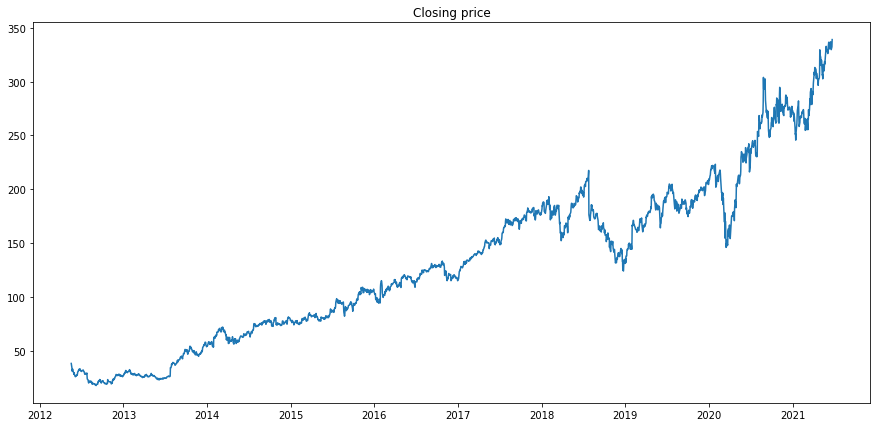

In [8]:
plt.figure(figsize = (15,7))
plt.plot(prices['Close'])
plt.title('Closing price')
plt.show()

**Above the close value of the Facebook stock could be seen. However, I have tested the API for several other stocks and for some of them the Close values are sometimes incorrect. Initially the data that I used only had this closing values but after reading some documentation I found that this 'Close' data is raw and if I need the actual closing value I will need different call to the API to get different dataset.**

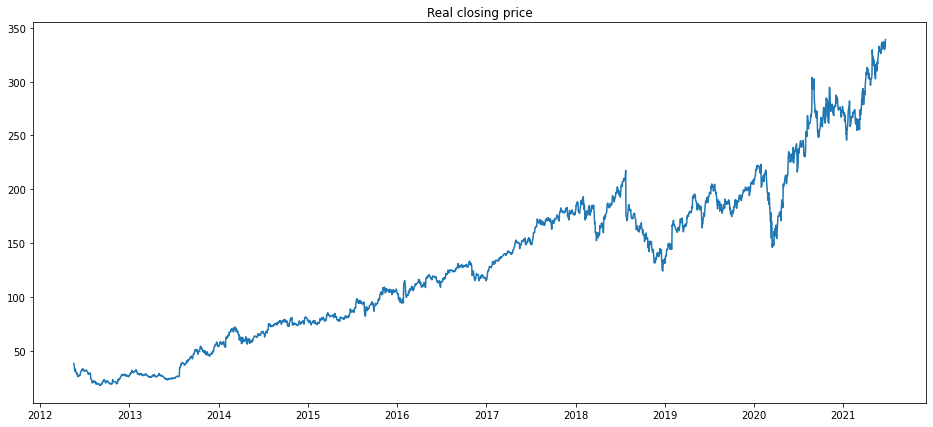

In [9]:
plt.figure(figsize = (16,7))
plt.plot(prices['Adjusted Close'])
plt.title('Real closing price')
plt.show()

Now we can see the accurate closing prices for Facebook since the stock became public in mid 2012. On first look there appears to be no difference but there are in fact little differences. Let's display both on top of each other to see that.

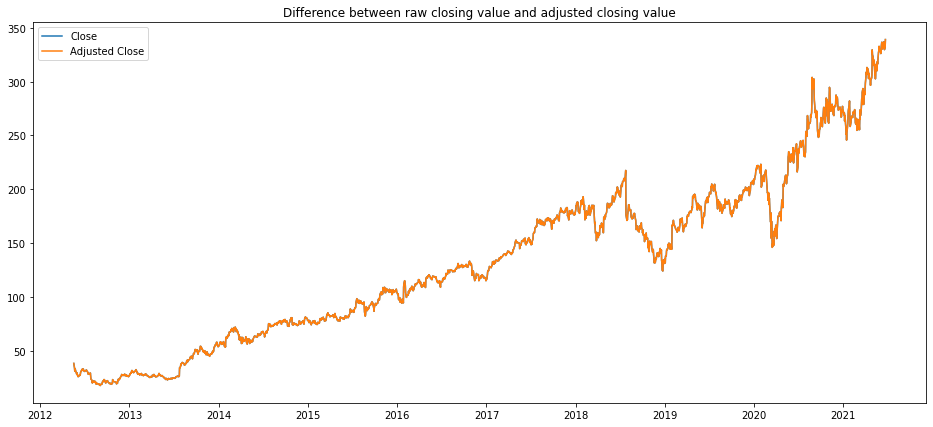

In [10]:
plt.figure(figsize = (16,7))
plt.plot(prices['Close'])
plt.plot(prices['Adjusted Close'])
plt.title('Difference between raw closing value and adjusted closing value')
plt.legend(['Close', 'Adjusted Close'])
plt.show()

The lines overlap which means that the Close value in this data is pretty accurate even though it is raw. This is a very good sign, because this means that the other values like High, Low and Open will also be accurate.

---

Let's use some functions to extract the moving averages of the Facebook stock from the API

In [11]:
ti = TechIndicators(key, output_format='pandas')
fb_moving_average_monthly, meta = ti.get_sma('FB', interval='monthly', time_period = 2, series_type='close')
fb_moving_average_weekly, meta = ti.get_sma('FB', interval='weekly', time_period = 2, series_type='close')

In [12]:
print(fb_moving_average_monthly, fb_moving_average_weekly)

                 SMA
date                
2012-07-31   26.4025
2012-08-31   19.8840
2012-09-28   19.8590
2012-10-31   21.3850
2012-11-30   24.5550
...              ...
2021-02-26  257.9750
2021-03-31  276.0750
2021-04-30  309.8050
2021-05-28  326.9050
2021-06-22  333.8800

[108 rows x 1 columns]                  SMA
date                
2012-06-01   29.8150
2012-06-08   27.4100
2012-06-15   28.5570
2012-06-22   31.5320
2012-06-29   32.0725
...              ...
2021-05-28  322.4800
2021-06-04  329.5400
2021-06-11  330.8050
2021-06-18  330.4600
2021-06-22  334.3450

[474 rows x 1 columns]


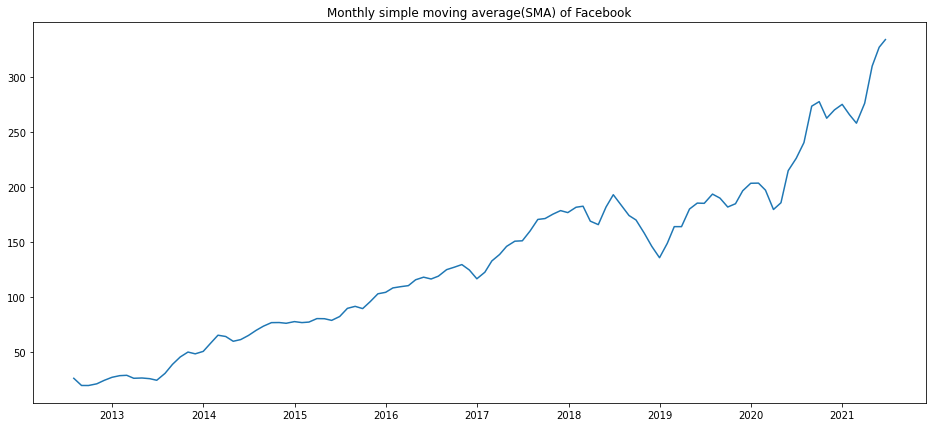

In [13]:
plt.figure(figsize = (16,7))
plt.plot(fb_moving_average_monthly)
plt.title('Monthly simple moving average(SMA) of Facebook')
plt.show()

This Simple Moving Average(SMA) represents the mean of the data set for a given period. In that case the SMA's period is one month. SMAs are part of the technical analysis in predicting the future value of a stock. Let's plot it on the same chart as the price movement.

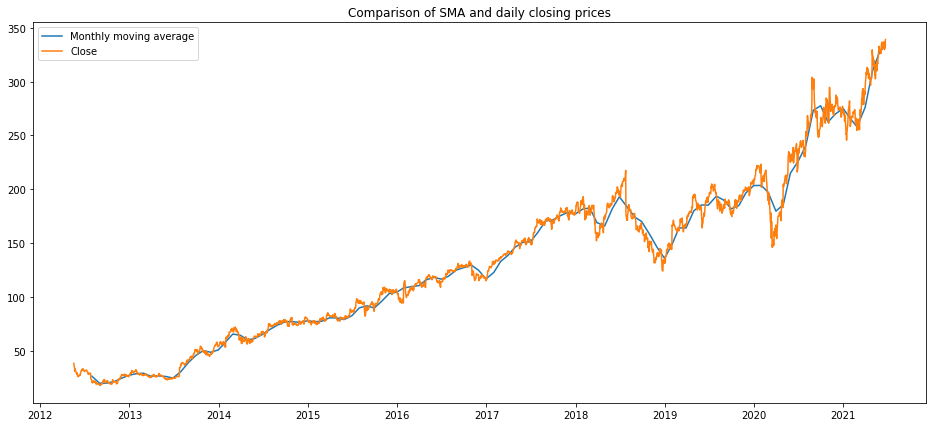

In [14]:
plt.figure(figsize = (16,7))
plt.plot(fb_moving_average_monthly)
plt.plot(prices['Adjusted Close'])
plt.legend(['Monthly moving average', 'Close'])
plt.title('Comparison of SMA and daily closing prices')
plt.show()

Such graphs can show very interesting data. For example, a change in direction of trend can be indicated by the penetration/crossover of the SMA. Generally a buy signal is generated when a price breaks above the moving average and sell signal is generated by a price break below the moving average. It is added confirmation when the moving average line turns in the direction of the price trend. When there is a high increase or decrease in a short period of time the SMA does not catch up immediately. That is because it uses average monthly values. Owing to this fact the Monthly SMA is good choice for long term predictions but less good for short term ones. <br>
The next graph will show how much better the weekly SMA is for short-term predictions.

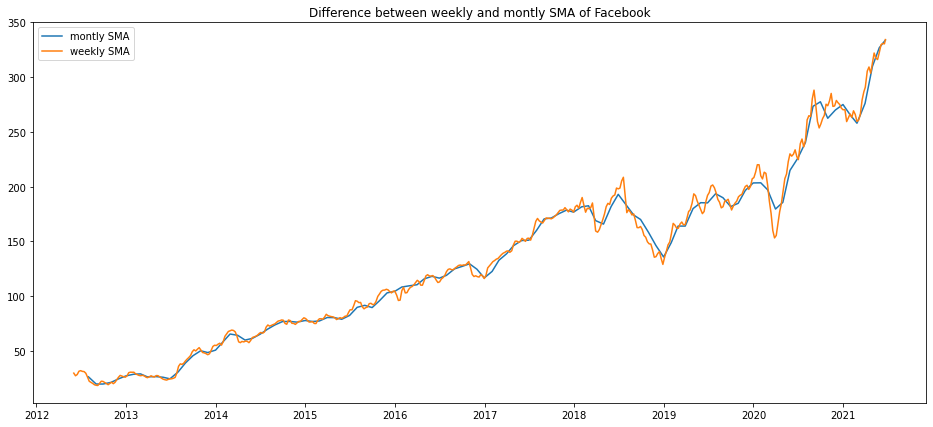

In [15]:
plt.figure(figsize = (16,7))
plt.plot(fb_moving_average_monthly)
plt.plot(fb_moving_average_weekly)
plt.title('Difference between weekly and montly SMA of Facebook')
plt.legend(['montly SMA', 'weekly SMA'])
plt.show()

**The weekly SMA looks more like the daily stock prices of Facebook. For this reason it can be better to use it for possible predictions as it is more sensitive to change in trends.**

---

In [16]:
import plotly.graph_objects as go

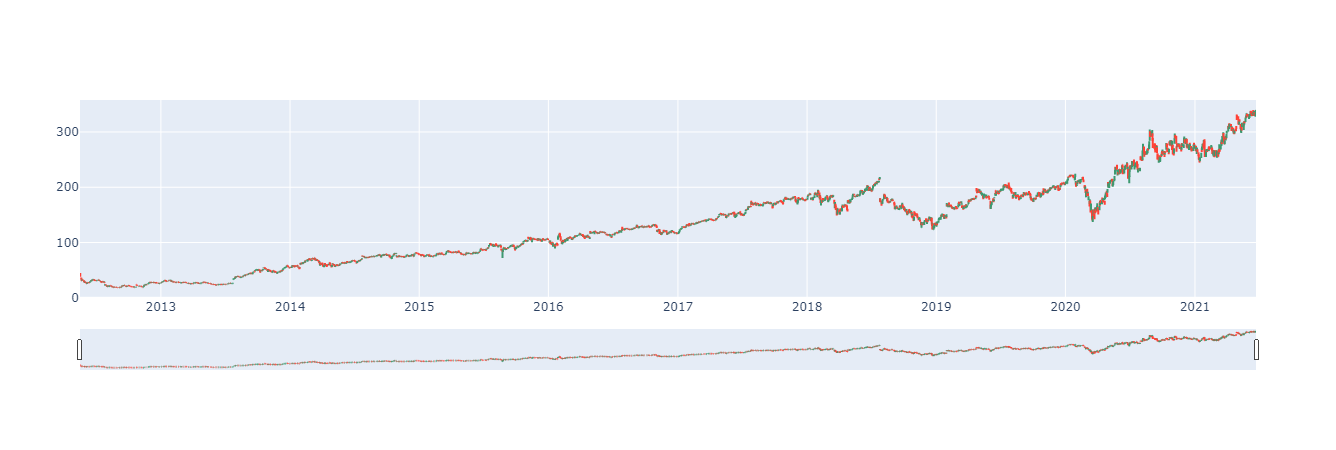

In [17]:
fig = go.Figure(data=go.Ohlc(x=prices.index.date,
                    open=prices['Open'],
                    high=prices['High'],
                    low=prices['Low'],
                    close=prices['Close']))
fig.show()

This OHLC chart(for open, high, low and close) is a style of financial chart describing the open, high, low and close values for a given date. The tip of the lines represent the low and high values and the horizontal lines repsent the open and close values. When there is an increase in the stock for a given day the lines are green and when there is a decrease - red. The bar below the graph can be used to filter the dates and observe a specific time period if needed.

---

Heatmaps are very useful to find relations between two variables in a dataset and this way the user gets a visualisation of the numeric data. No correlations are extremely high. Each square shows the correlation between the variables on each axis. Let's visualize a heatmap on all features in the data set.

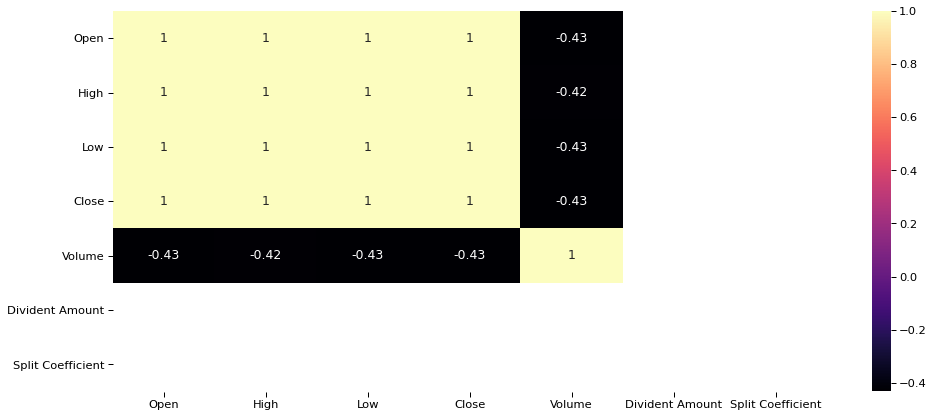

In [18]:
df_temp = prices.copy()
Index= ['Open', 'High', 'Low', 'Close', 'Volume', 'Divident Amount', 'Split Coefficient']

plt.figure(figsize=(16, 7))
sns.set_context('paper', font_scale=1.3)
sns.heatmap(df_temp[Index].corr(), annot=True, cmap = 'magma')
plt.show()

The closer to 1 the correlation is the more positively correlated they are, that is as one increases so does the other and the closer to 1 the stronger this relationship is. In our case the relations are absolute 1 for many of the columns because they move together with the price. The divident amount and the split coefficient, however, do not have any relation in this case. Later in the notebook the reason for that could be seen.

---

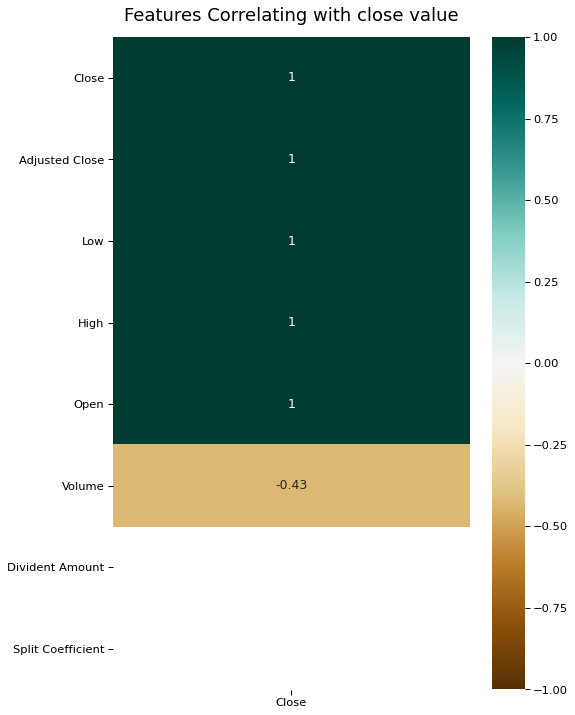

In [19]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(prices.corr()[['Close']].sort_values(by='Close', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with close value', fontdict={'fontsize':18}, pad=16);

Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The closer to 1 the correlation is the more positively correlated they are, that is as one increases so does the other and the closer to 1 the stronger this relationship is. In that case most of the values correlate fully with each other because the price of stock usually moves along the other features like low, high and open.

---

Both the heatmap and the correlation diagram show that there is no big relation between the volume of a stock and it's price. However, my research shows that Volume is a big part of the Technical analysis when a prediction is made for a specific stock. This is why we are going to display the volume of the Facebook stock now.

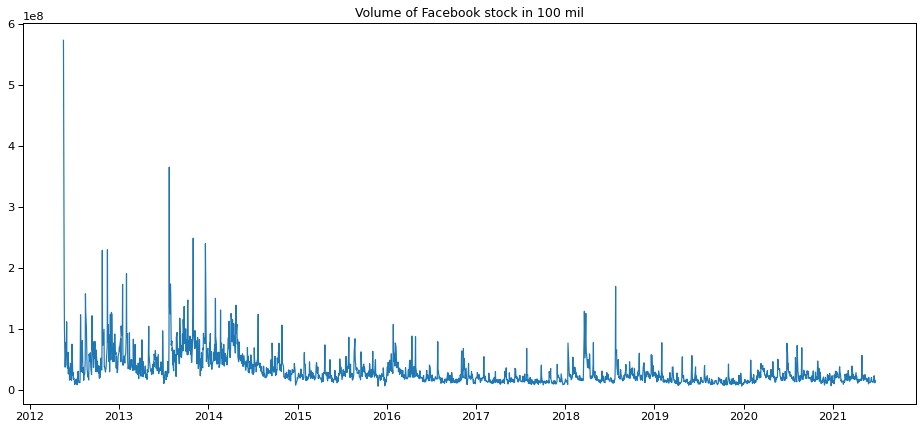

In [20]:
plt.figure(figsize = (16,7))
plt.plot(prices['Volume'])
plt.title('Volume of Facebook stock in 100 mil')
plt.show()

Even though in the heatmap and the correlation diagram the volume does not seem so important to the closing value it does have a huge impact on the price because this value represents the amount of time the stock has been bought/sold during the day. Let's try to display both values.

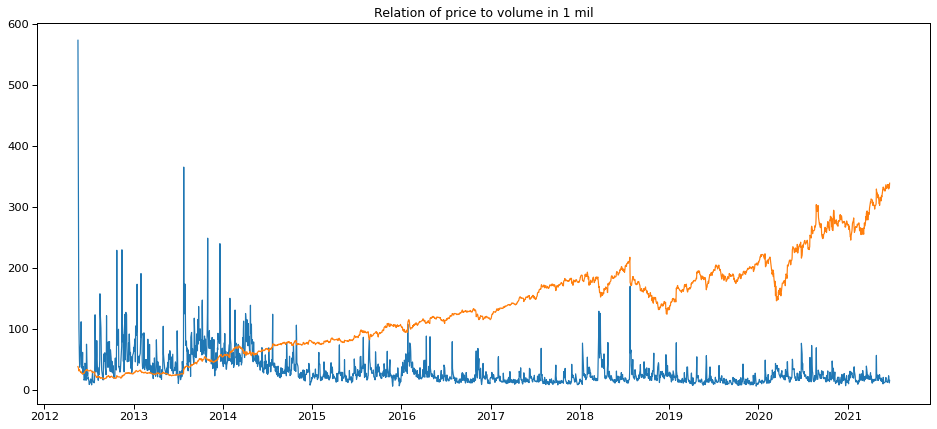

In [21]:
plt.figure(figsize = (16,7))
plt.plot(prices['Volume']/1000000)
plt.plot(prices['Close'])
plt.title('Relation of price to volume in 1 mil')
plt.show()

As expected, on the graph we can see that when there is a drastic change in the volume there is big impact on the price which either increases or decreases. That confirms the fact that Volume is an important feature when predicting the price. <br>
Let's now check if the Facebook stock has any dividents given or if it has splitted stocks.

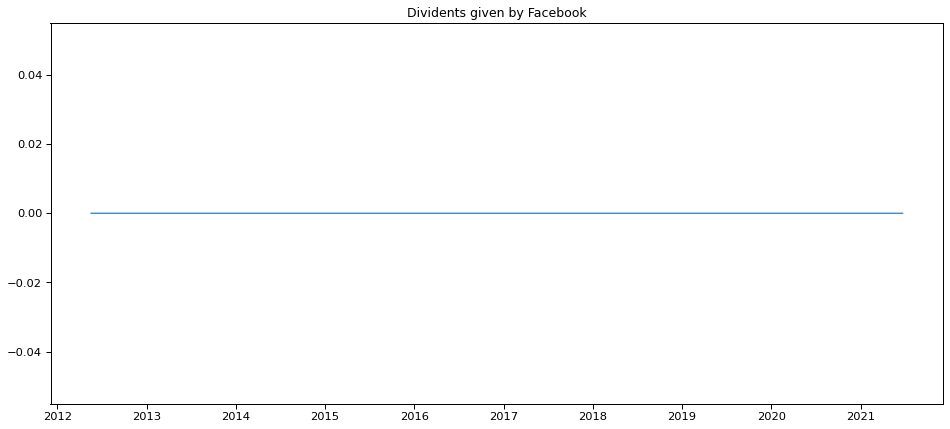

In [22]:
plt.figure(figsize = (16,7))
plt.plot(prices['Divident Amount'])
plt.title('Dividents given by Facebook')
plt.show()

It appears that Facebook that never given dividents to its shareholders. In that case it doesn't make sense to include it in the model, but since other companies do give dividents it would not be wise to drop such column so fast.

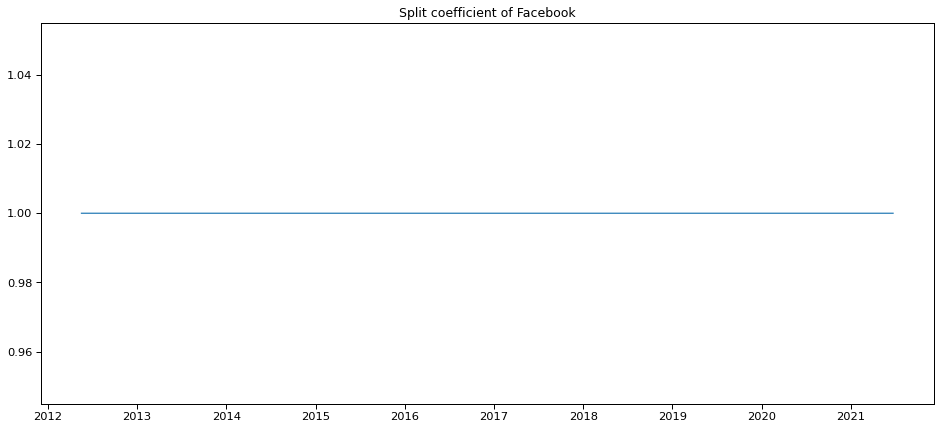

In [23]:
#prices['Split Coefficient'].value_counts()
plt.figure(figsize = (16,7))
plt.plot(prices['Split Coefficient'])
plt.title('Split coefficient of Facebook')
plt.show()

Just like the dividents, facebook has not split it's shares. Since the values are only zeros, that is the reason why there is no relation at all with the other values in the dataset. Futher research is needed to see what potential impact does these two values have on the price of a stock.

**Post research:**
>* If a split occurs a stock's price is affected. After a split, the stock price will be reduced (since the number of shares outstanding has increased). For example if we have a 2 for 1 stock split(let's say the company had 10 million shares outstanding before the split, now it will have 20 million) the price of the stock will halve its price. <br>
>*  Before a dividend is distributed, the issuing company must first declare the dividend amount and the date when it will be paid. The declaration of a dividend naturally encourages investors to purchase stock which leads to increase to the stocks value.

**Conclusion**
> Some very interesting patterns were found in the dataset, including ones that the heatmap and the correlation diagram could not find, but thanks to the domain research, I was able to find them. The next steps include data preparation. Thankfully the API returns very good data and currently I have not experienced problems with missing values in the dataset. Yet possibilities for combining this dataset with other data from the API might be possible to see if I can find any other relations that could help in making the prediction as accurate as possible.

---
---

> After some more domain research I have found that several other features regarding technical and fundamental analysis could be integrated to the current dataset that could possibly improve the predictions:
> * Short volume
> * Float size
> * Short percentage of float
> * Relative strenght index ( RSI )

In [24]:
fd = FundamentalData(key, output_format = 'pandas')

In [25]:
prices_overview = fd.get_company_overview('FB')

In [26]:
prices_overview[0]

Symbol     AssetType           Name  \
NaN     FB  Common Stock  Facebook, Inc   

                                           Description      CIK Exchange  \
NaN  Facebook, Inc., is an American multinational t...  1326801   NASDAQ   

    Currency Country      Sector  \
NaN      USD     USA  TECHNOLOGY   

                                              Industry  ... ShortPercentFloat  \
NaN  SERVICES-COMPUTER PROGRAMMING, DATA PROCESSING...  ...            0.0114   

    PercentInsiders PercentInstitutions ForwardAnnualDividendRate  \
NaN           0.585              80.339                         0   

    ForwardAnnualDividendYield PayoutRatio DividendDate ExDividendDate  \
NaN                          0           0         None           None   

    LastSplitFactor LastSplitDate  
NaN            None          None  

[1 rows x 59 columns]

**In here I encounter the problem that historical data about a company's overview like float size and short percent of float is missing. I looked into other APIs but none offer such data. For this reason these values cannot be combined with this dataset and when the model is being trained. It could only be used with separate fundamental analysis formulas that might be integrated to a model but that would probably mean building my own model which is not the purpose of this challenge.**

---

The relative strenght index, however, I could find historical records. It describes a momentum indicator that measures the magnitude of recent price changes in order to evaluate overbought or oversold conditions in the price of a stock or other asset. For this reason I decided to combine it with the data that I already have.

In [27]:
rsi = ti.get_rsi('FB', interval='daily', time_period = 2, series_type='close')

In [28]:
#visualize how it looks
rsi[0]

RSI
date               
2012-05-22   0.0000
2012-05-23  21.6642
2012-05-24  45.8365
2012-05-25  27.4294
2012-05-29   8.5676
...             ...
2021-06-16  20.8962
2021-06-17  67.5041
2021-06-18  27.1476
2021-06-21  50.0693
2021-06-22  80.8888

[2286 rows x 1 columns]

Everything looks good. Let's combine the datasets.

In [29]:
demo = prices.copy()

In [30]:
df_prices = pd.merge(demo,rsi[0], how='outer', left_index=True, right_index=True)

The aim is to merge both datasets and still keep all rows (because the prices dataframe consists of two more rows)

In [31]:
df_prices

Open    High     Low     Close  Adjusted Close       Volume  \
date                                                                         
2012-05-18   42.050   45.00   38.00   38.2318         38.2318  573576400.0   
2012-05-21   36.530   36.66   33.00   34.0300         34.0300  168192700.0   
2012-05-22   32.610   33.59   30.94   31.0000         31.0000  101786600.0   
2012-05-23   31.370   32.50   31.36   32.0000         32.0000   73600000.0   
2012-05-24   32.950   33.21   31.77   33.0300         33.0300   50237200.0   
...             ...     ...     ...       ...             ...          ...   
2021-06-16  336.695  337.55  328.72  331.0800        331.0800   17031281.0   
2021-06-17  330.490  337.98  330.15  336.5100        336.5100   17794080.0   
2021-06-18  334.530  336.15  329.00  329.6600        329.6600   23039457.0   
2021-06-21  331.090  332.92  327.65  332.2900        332.2900   11337522.0   
2021-06-22  332.685  339.92  332.60  339.0300        339.0300   15345299.0   

            Divident Amount  Split Coefficient      RSI  
date                                                     
2012-05-18              0.0                1.0      NaN  
2012-05-21              0.0                1.0      NaN  
2012-05-22              0.0                1.0   0.0000  
2012-05-23              0.0                1.0  21.6642  
2012-05-24              0.0                1.0  45.8365  
...                     ...                ...      ...  
2021-06-16              0.0                1.0  20.8962  
2021-06-17              0.0                1.0  67.5041  
2021-06-18              0.0                1.0  27.1476  
2021-06-21              0.0                1.0  50.0693  
2021-06-22              0.0                1.0  80.8888  

[2288 rows x 9 columns]

Since we have data two days after Facebook became public we have 2 NaN values. Let's fill them with 0 because that is also the correct index for these 2 dates.

In [32]:
df_prices = df_prices.fillna(0)

Let's visualize the relative strenght index.

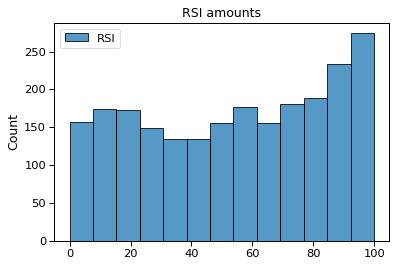

In [33]:
sns.histplot(df_prices[['RSI']])
plt.title('RSI amounts')
plt.show()

An asset is usually considered overbought when the RSI is above 70% and oversold when it is below 30%. We can clearly see that in our case it is more often overbought.

---

**Now we combine the simple moving avarage that we extracted in the EDA to enrich the data more.**

In [34]:
#initialize the column name
df_prices['SMA weekly'] = np.nan

Since the SMA data is weekly and our data is daily some if statement will be needed to make sure each day corresponds to the SMA of the week.

In [35]:
sma = 0
for index in range (9,df_prices.shape[0]):
    if df_prices.index[index] >= fb_moving_average_weekly.index[sma] and df_prices.index[index] < fb_moving_average_weekly.index[sma+1]:
        df_prices['SMA weekly'][index] = fb_moving_average_weekly.iloc[sma]['SMA']
    else:
        df_prices['SMA weekly'][index] = fb_moving_average_weekly.iloc[sma+1]['SMA']
        sma = sma+1

In [36]:
df_prices.head(15)

Open   High    Low    Close  Adjusted Close       Volume  \
date                                                                     
2012-05-18  42.050  45.00  38.00  38.2318         38.2318  573576400.0   
2012-05-21  36.530  36.66  33.00  34.0300         34.0300  168192700.0   
2012-05-22  32.610  33.59  30.94  31.0000         31.0000  101786600.0   
2012-05-23  31.370  32.50  31.36  32.0000         32.0000   73600000.0   
2012-05-24  32.950  33.21  31.77  33.0300         33.0300   50237200.0   
2012-05-25  32.900  32.95  31.11  31.9100         31.9100   37149800.0   
2012-05-29  31.480  31.69  28.65  28.8400         28.8400   78063400.0   
2012-05-30  28.695  29.55  27.86  28.1900         28.1900   57267900.0   
2012-05-31  28.545  29.67  26.83  29.6000         29.6000  111639200.0   
2012-06-01  28.892  29.15  27.39  27.7200         27.7200   41855500.0   
2012-06-04  27.200  27.65  26.44  26.9000         26.9000   35230300.0   
2012-06-05  26.700  27.76  25.75  25.8690         25.8690   42473400.0   
2012-06-06  26.070  27.17  25.52  26.8100         26.8100   61489200.0   
2012-06-07  27.000  27.35  26.15  26.3100         26.3100   26159500.0   
2012-06-08  26.550  27.76  26.44  27.1000         27.1000   38034000.0   

            Divident Amount  Split Coefficient      RSI  SMA weekly  
date                                                                 
2012-05-18              0.0                1.0   0.0000         NaN  
2012-05-21              0.0                1.0   0.0000         NaN  
2012-05-22              0.0                1.0   0.0000         NaN  
2012-05-23              0.0                1.0  21.6642         NaN  
2012-05-24              0.0                1.0  45.8365         NaN  
2012-05-25              0.0                1.0  27.4294         NaN  
2012-05-29              0.0                1.0   8.5676         NaN  
2012-05-30              0.0                1.0   6.6355         NaN  
2012-05-31              0.0                1.0  52.8082         NaN  
2012-06-01              0.0                1.0  22.7741      29.815  
2012-06-04              0.0                1.0  15.2220      29.815  
2012-06-05              0.0                1.0   8.3004      29.815  
2012-06-06              0.0                1.0  49.8917      29.815  
2012-06-07              0.0                1.0  33.6652      29.815  
2012-06-08              0.0                1.0  67.2864      27.410

The first 9 rows are NaNs bacause there is no data for them. Let's fix that by calculating the SMA and adding it to them. 

In [37]:
sma_value = 0
for y in range(0,6):
    sma_value = sma_value + df_prices['Close'][y]
sma_value = sma_value/6
df_prices['SMA weekly'][0:5] = sma_value
sma_value = 0
for y in range(5,9):
    sma_value = sma_value + df_prices['Close'][y]
sma_value = sma_value/4
df_prices['SMA weekly'][5:9] = sma_value

In [38]:
df_prices.head(10)

Open   High    Low    Close  Adjusted Close       Volume  \
date                                                                     
2012-05-18  42.050  45.00  38.00  38.2318         38.2318  573576400.0   
2012-05-21  36.530  36.66  33.00  34.0300         34.0300  168192700.0   
2012-05-22  32.610  33.59  30.94  31.0000         31.0000  101786600.0   
2012-05-23  31.370  32.50  31.36  32.0000         32.0000   73600000.0   
2012-05-24  32.950  33.21  31.77  33.0300         33.0300   50237200.0   
2012-05-25  32.900  32.95  31.11  31.9100         31.9100   37149800.0   
2012-05-29  31.480  31.69  28.65  28.8400         28.8400   78063400.0   
2012-05-30  28.695  29.55  27.86  28.1900         28.1900   57267900.0   
2012-05-31  28.545  29.67  26.83  29.6000         29.6000  111639200.0   
2012-06-01  28.892  29.15  27.39  27.7200         27.7200   41855500.0   

            Divident Amount  Split Coefficient      RSI  SMA weekly  
date                                                                 
2012-05-18              0.0                1.0   0.0000   33.366967  
2012-05-21              0.0                1.0   0.0000   33.366967  
2012-05-22              0.0                1.0   0.0000   33.366967  
2012-05-23              0.0                1.0  21.6642   33.366967  
2012-05-24              0.0                1.0  45.8365   33.366967  
2012-05-25              0.0                1.0  27.4294   29.635000  
2012-05-29              0.0                1.0   8.5676   29.635000  
2012-05-30              0.0                1.0   6.6355   29.635000  
2012-05-31              0.0                1.0  52.8082   29.635000  
2012-06-01              0.0                1.0  22.7741   29.815000

Now there are no mising values in the data

Let's see how the heat map changes with the new columns added.

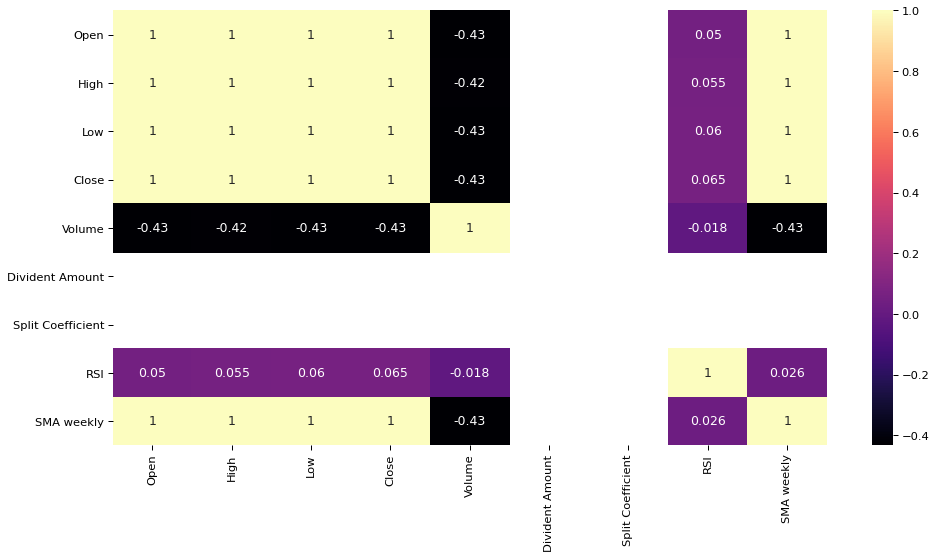

In [39]:
df_temp = df_prices.copy()
Index= ['Open', 'High', 'Low', 'Close', 'Volume', 'Divident Amount', 'Split Coefficient', 'RSI', 'SMA weekly']

plt.figure(figsize=(16, 8))
sns.set_context('paper', font_scale=1.3)
sns.heatmap(df_temp[Index].corr(), annot=True, cmap = 'magma')
plt.show()

The sma expectedly correlates with the prices, the rsi however appears to be of less importance.

---

**After enriching the data with RSI and SMA we will now consider different factors like global events happening. Let's begin by COVID since it is the one of the biggest crizises in our time and it definitely had impact on the stock market.**

In [40]:
df_covid = pd.read_csv('data/owid-covid-data.csv')

In [41]:
df_covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

We have plenty of data to work with, however we will only use the total cases since this feature is the most important.

First we will check all the different locations to see whether we have all or atleast enough countries.

In [42]:
df_covid['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

My initial plan was to add the total cases of each country but it appears that the dataset includes the location 'World' which is a summarized data for the whole world and this is what I am going to use. Let's leave only the rows that concern the world and visualize the data.

In [43]:
df_covid = df_covid.loc[df_covid['location'] == 'World']

In [44]:
df_covid

iso_code continent location        date  total_cases  new_cases  \
95514  OWID_WRL       NaN    World  2020-01-22        557.0        0.0   
95515  OWID_WRL       NaN    World  2020-01-23        655.0       98.0   
95516  OWID_WRL       NaN    World  2020-01-24        941.0      286.0   
95517  OWID_WRL       NaN    World  2020-01-25       1433.0      492.0   
95518  OWID_WRL       NaN    World  2020-01-26       2118.0      685.0   
...         ...       ...      ...         ...          ...        ...   
96026  OWID_WRL       NaN    World  2021-06-17  177434597.0   392337.0   
96027  OWID_WRL       NaN    World  2021-06-18  177840377.0   405780.0   
96028  OWID_WRL       NaN    World  2021-06-19  178187719.0   347342.0   
96029  OWID_WRL       NaN    World  2021-06-20  178487909.0   300190.0   
96030  OWID_WRL       NaN    World  2021-06-21  178786160.0   298251.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
95514                 NaN          17.0         0.0                  NaN  ...   
95515                 NaN          18.0         1.0                  NaN  ...   
95516                 NaN          26.0         8.0                  NaN  ...   
95517                 NaN          42.0        16.0                  NaN  ...   
95518                 NaN          56.0        14.0                  NaN  ...   
...                   ...           ...         ...                  ...  ...   
96026          366669.714     3842335.0      9261.0             9836.857  ...   
96027          364458.429     3851539.0      9204.0             9447.429  ...   
96028          360949.714     3859605.0      8066.0             9206.000  ...   
96029          360560.286     3866158.0      6553.0             8835.429  ...   
96030          359093.429     3873255.0      7097.0             8723.429  ...   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
95514             10.0                 233.07                 8.51   
95515             10.0                 233.07                 8.51   
95516             10.0                 233.07                 8.51   
95517             10.0                 233.07                 8.51   
95518             10.0                 233.07                 8.51   
...                ...                    ...                  ...   
96026             10.0                 233.07                 8.51   
96027             10.0                 233.07                 8.51   
96028             10.0                 233.07                 8.51   
96029             10.0                 233.07                 8.51   
96030             10.0                 233.07                 8.51   

       female_smokers  male_smokers  handwashing_facilities  \
95514           6.434        34.635                   60.13   
95515           6.434        34.635                   60.13   
95516           6.434        34.635                   60.13   
95517           6.434        34.635                   60.13   
95518           6.434        34.635                   60.13   
...               ...           ...                     ...   
96026           6.434        34.635                   60.13   
96027           6.434        34.635                   60.13   
96028           6.434        34.635                   60.13   
96029           6.434        34.635                   60.13   
96030           6.434        34.635                   60.13   

       hospital_beds_per_thousand  life_expectancy  human_development_index  \
95514                       2.705            72.58                    0.737   
95515                       2.705            72.58                    0.737   
95516                       2.705            72.58                    0.737   
95517                       2.705            72.58                    0.737   
95518                       2.705            72.58                    0.737   
...                           ...              ...                      .

Since in my data about stock market the index value is date I would like to do that here as well, but first we have to check the type of the data to make sure it is in date format.

In [45]:
df_covid.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

The data appears to be an object so let's convert it to date.

In [46]:
df_covid['date'] = pd.to_datetime(df_covid['date'])

Now that the date is in the correct format we can set it as an index

In [47]:
df_covid = df_covid.set_index('date')

We will now visualize the total cases of covid for every day since the covid outbreak. The idea is combine this data with the stock market data.

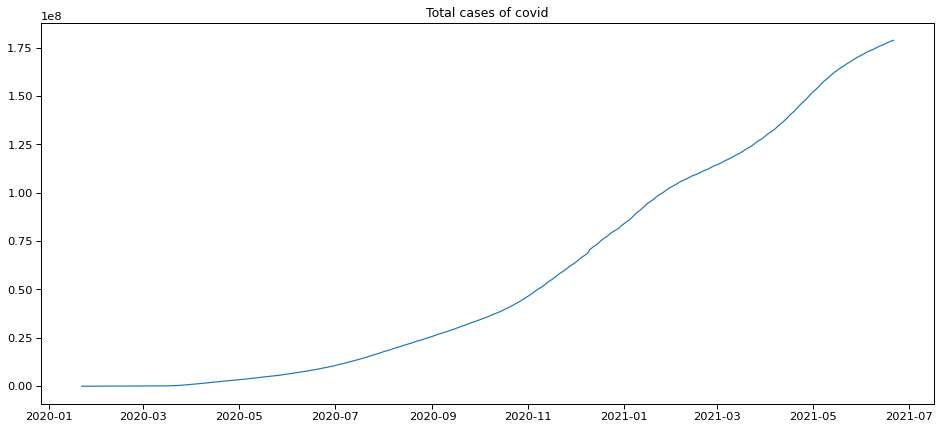

In [48]:
plt.figure(figsize = (16,7))
plt.plot(df_covid['total_cases'])
plt.title('Total cases of covid')
plt.show()

This graph is constantly going up since every day new cases are reproted. For this reason the total cases column might not be that interesting to work with. Let's go to the new cases data.

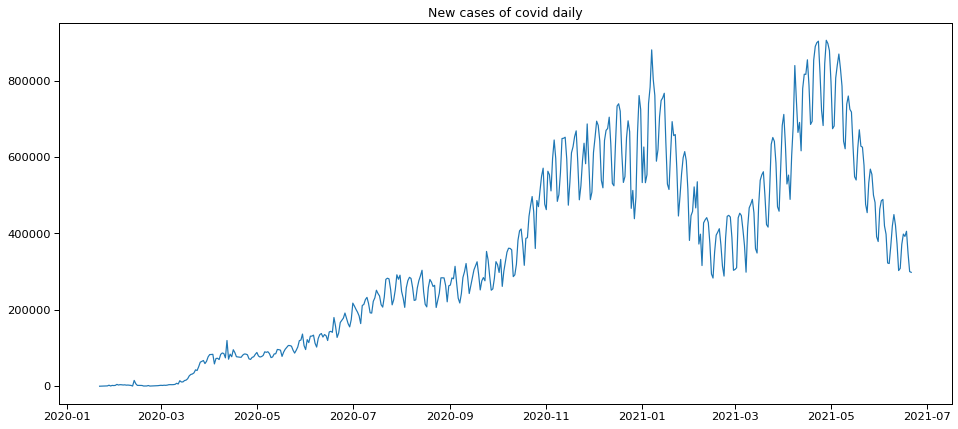

In [49]:
plt.figure(figsize = (16,7))
plt.plot(df_covid['new_cases'])
plt.title('New cases of covid daily')
plt.show()

This graph is a bit more curvy and should make better use in our model.

Let's also visualize how the deaths per day look like.

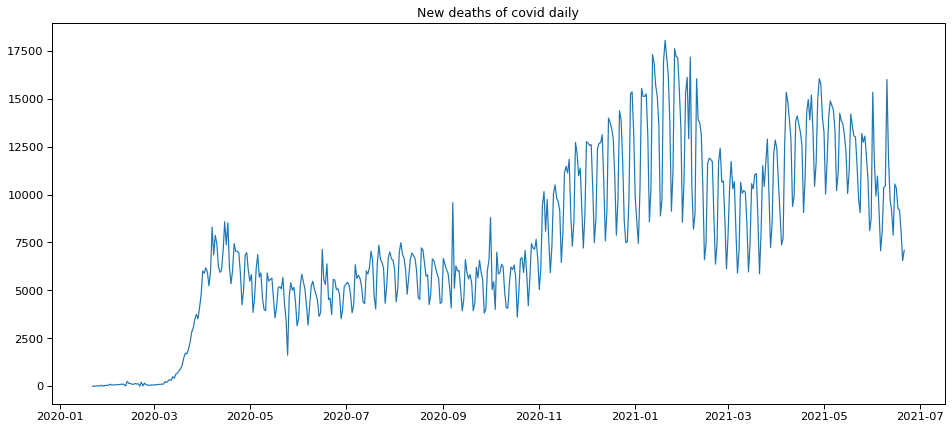

In [50]:
plt.figure(figsize = (16,7))
plt.plot(df_covid['new_deaths'])
plt.title('New deaths of covid daily')
plt.show()

**Since the beginning of the covid pandemic many of the stocks on the market are going down. For this reason I believe that data like new cases or new deaths per day could be important because the more cases/deaths the bigger panic in the world and the more likely that the stock market will have downtrends.**

Now we will combine the current dataset with the next cases column in the covid data

In [51]:
df_combined = pd.merge(df_prices,df_covid[['new_cases', 'new_deaths']], how='outer', left_index=True, right_index=True)

In [52]:
df_combined

Open    High     Low     Close  Adjusted Close       Volume  \
date                                                                         
2012-05-18   42.050   45.00   38.00   38.2318         38.2318  573576400.0   
2012-05-21   36.530   36.66   33.00   34.0300         34.0300  168192700.0   
2012-05-22   32.610   33.59   30.94   31.0000         31.0000  101786600.0   
2012-05-23   31.370   32.50   31.36   32.0000         32.0000   73600000.0   
2012-05-24   32.950   33.21   31.77   33.0300         33.0300   50237200.0   
...             ...     ...     ...       ...             ...          ...   
2021-06-18  334.530  336.15  329.00  329.6600        329.6600   23039457.0   
2021-06-19      NaN     NaN     NaN       NaN             NaN          NaN   
2021-06-20      NaN     NaN     NaN       NaN             NaN          NaN   
2021-06-21  331.090  332.92  327.65  332.2900        332.2900   11337522.0   
2021-06-22  332.685  339.92  332.60  339.0300        339.0300   15345299.0   

            Divident Amount  Split Coefficient      RSI  SMA weekly  \
date                                                                  
2012-05-18              0.0                1.0   0.0000   33.366967   
2012-05-21              0.0                1.0   0.0000   33.366967   
2012-05-22              0.0                1.0   0.0000   33.366967   
2012-05-23              0.0                1.0  21.6642   33.366967   
2012-05-24              0.0                1.0  45.8365   33.366967   
...                     ...                ...      ...         ...   
2021-06-18              0.0                1.0  27.1476  330.460000   
2021-06-19              NaN                NaN      NaN         NaN   
2021-06-20              NaN                NaN      NaN         NaN   
2021-06-21              0.0                1.0  50.0693  330.460000   
2021-06-22              0.0                1.0  80.8888  334.345000   

            new_cases  new_deaths  
date                               
2012-05-18        NaN         NaN  
2012-05-21        NaN         NaN  
2012-05-22        NaN         NaN  
2012-05-23        NaN         NaN  
2012-05-24        NaN         NaN  
...               ...         ...  
2021-06-18   405780.0      9204.0  
2021-06-19   347342.0      8066.0  
2021-06-20   300190.0      6553.0  
2021-06-21   298251.0      7097.0  
2021-06-22        NaN         NaN  

[2448 rows x 12 columns]

However there are plenty of NaN values because the coronavirus came in the beginning of 2020 so we will have to fill the valeus before this date with 0 and also drop the rows where there is no data for stock market because it is closed on this dates. Next line of code will do exactly these 2 things,

In [53]:
df_combined = df_combined.fillna(0)
for index, row in df_combined.iterrows():
    if row.Close == 0:   
        df_combined.drop(index, inplace=True)

In [54]:
#Check if it worked
df_combined

Open    High     Low     Close  Adjusted Close       Volume  \
date                                                                         
2012-05-18   42.050   45.00   38.00   38.2318         38.2318  573576400.0   
2012-05-21   36.530   36.66   33.00   34.0300         34.0300  168192700.0   
2012-05-22   32.610   33.59   30.94   31.0000         31.0000  101786600.0   
2012-05-23   31.370   32.50   31.36   32.0000         32.0000   73600000.0   
2012-05-24   32.950   33.21   31.77   33.0300         33.0300   50237200.0   
...             ...     ...     ...       ...             ...          ...   
2021-06-16  336.695  337.55  328.72  331.0800        331.0800   17031281.0   
2021-06-17  330.490  337.98  330.15  336.5100        336.5100   17794080.0   
2021-06-18  334.530  336.15  329.00  329.6600        329.6600   23039457.0   
2021-06-21  331.090  332.92  327.65  332.2900        332.2900   11337522.0   
2021-06-22  332.685  339.92  332.60  339.0300        339.0300   15345299.0   

            Divident Amount  Split Coefficient      RSI  SMA weekly  \
date                                                                  
2012-05-18              0.0                1.0   0.0000   33.366967   
2012-05-21              0.0                1.0   0.0000   33.366967   
2012-05-22              0.0                1.0   0.0000   33.366967   
2012-05-23              0.0                1.0  21.6642   33.366967   
2012-05-24              0.0                1.0  45.8365   33.366967   
...                     ...                ...      ...         ...   
2021-06-16              0.0                1.0  20.8962  330.805000   
2021-06-17              0.0                1.0  67.5041  330.805000   
2021-06-18              0.0                1.0  27.1476  330.460000   
2021-06-21              0.0                1.0  50.0693  330.460000   
2021-06-22              0.0                1.0  80.8888  334.345000   

            new_cases  new_deaths  
date                               
2012-05-18        0.0         0.0  
2012-05-21        0.0         0.0  
2012-05-22        0.0         0.0  
2012-05-23        0.0         0.0  
2012-05-24        0.0         0.0  
...               ...         ...  
2021-06-16   398424.0     10332.0  
2021-06-17   392337.0      9261.0  
2021-06-18   405780.0      9204.0  
2021-06-21   298251.0      7097.0  
2021-06-22        0.0         0.0  

[2288 rows x 12 columns]

Now it looks how it is supposed to be. Let's also rename the new column name

In [55]:
df_combined.rename(columns={'new_cases': 'Coronavirus cases', 'new_deaths': 'Coronavirus deaths'}, inplace=True)

In [56]:
df_combined

Open    High     Low     Close  Adjusted Close       Volume  \
date                                                                         
2012-05-18   42.050   45.00   38.00   38.2318         38.2318  573576400.0   
2012-05-21   36.530   36.66   33.00   34.0300         34.0300  168192700.0   
2012-05-22   32.610   33.59   30.94   31.0000         31.0000  101786600.0   
2012-05-23   31.370   32.50   31.36   32.0000         32.0000   73600000.0   
2012-05-24   32.950   33.21   31.77   33.0300         33.0300   50237200.0   
...             ...     ...     ...       ...             ...          ...   
2021-06-16  336.695  337.55  328.72  331.0800        331.0800   17031281.0   
2021-06-17  330.490  337.98  330.15  336.5100        336.5100   17794080.0   
2021-06-18  334.530  336.15  329.00  329.6600        329.6600   23039457.0   
2021-06-21  331.090  332.92  327.65  332.2900        332.2900   11337522.0   
2021-06-22  332.685  339.92  332.60  339.0300        339.0300   15345299.0   

            Divident Amount  Split Coefficient      RSI  SMA weekly  \
date                                                                  
2012-05-18              0.0                1.0   0.0000   33.366967   
2012-05-21              0.0                1.0   0.0000   33.366967   
2012-05-22              0.0                1.0   0.0000   33.366967   
2012-05-23              0.0                1.0  21.6642   33.366967   
2012-05-24              0.0                1.0  45.8365   33.366967   
...                     ...                ...      ...         ...   
2021-06-16              0.0                1.0  20.8962  330.805000   
2021-06-17              0.0                1.0  67.5041  330.805000   
2021-06-18              0.0                1.0  27.1476  330.460000   
2021-06-21              0.0                1.0  50.0693  330.460000   
2021-06-22              0.0                1.0  80.8888  334.345000   

            Coronavirus cases  Coronavirus deaths  
date                                               
2012-05-18                0.0                 0.0  
2012-05-21                0.0                 0.0  
2012-05-22                0.0                 0.0  
2012-05-23                0.0                 0.0  
2012-05-24                0.0                 0.0  
...                       ...                 ...  
2021-06-16           398424.0             10332.0  
2021-06-17           392337.0              9261.0  
2021-06-18           405780.0              9204.0  
2021-06-21           298251.0              7097.0  
2021-06-22                0.0                 0.0  

[2288 rows x 12 columns]

**Another thing to take into consideration is exchange rates. I used some domain research to find out it has impact on the stocks value. How strong the US dollar stands is one of the factors affecting share prices in America(since Facebook is american company). A strong dollar means that the economy is growing and this will lead to higher stock prices. I have extracted a dataset from a website with historical data of relation between USD and EUR since Facebook became open.**

In [57]:
df_dollar = pd.read_csv('data/USD_EUR Historical Data.csv')

Let's again take a look at the types of the columns in the data - we need once again need date to be a datetime format and to make it index value.

In [58]:
df_dollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2367 entries, 0 to 2366
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2367 non-null   object 
 1   Price     2367 non-null   float64
 2   Open      2367 non-null   float64
 3   High      2367 non-null   float64
 4   Low       2367 non-null   float64
 5   Change %  2367 non-null   object 
dtypes: float64(4), object(2)
memory usage: 111.1+ KB


In [59]:
df_dollar.head(5)

Date   Price    Open    High     Low Change %
0  Jun 22, 2021  0.8376  0.8395  0.8417  0.8367   -0.22%
1  Jun 21, 2021  0.8395  0.8425  0.8440  0.8389   -0.41%
2  Jun 18, 2021  0.8429  0.8397  0.8441  0.8385    0.39%
3  Jun 17, 2021  0.8396  0.8336  0.8409  0.8328    0.71%
4  Jun 16, 2021  0.8337  0.8246  0.8338  0.8240    1.12%

We have some interesting data but we will only make use of the Price column.

Let's convert the date to the right format and make it index of the dataframe

In [60]:
df_dollar['Date'] = pd.to_datetime(df_dollar['Date'])

In [61]:
df_dollar = df_dollar.set_index('Date')

Let's take a look at how the dollar has changed since 2012.

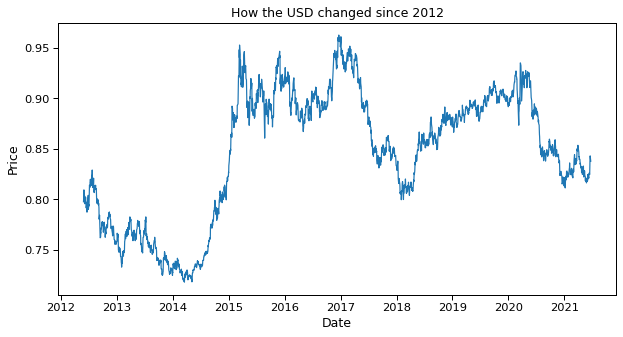

In [100]:
plt.figure(figsize=(10,5))

sns.lineplot(x=df_dollar.index, y='Price', data=df_dollar)
plt.title('How the USD changed since 2012')
plt.show()

We can observe big changes in the currency which is pretty good - the curvier the line the easier to find any relations with the stock market prices.

Now that the data is in the right format we can merge the price column with our dataset. 

In [62]:
df_combined = pd.merge(df_combined,df_dollar['Price'], how='outer', left_index=True, right_index=True)

The data is available 5-6 days after the release of the facebook value so we have a couple of NaN value in the beginning which we will replace now with the first number which is 0.8802

In [63]:
df_combined = df_combined.fillna(0)
for index, row in df_combined.iterrows():
    if row.Price == 0:
        row.Price = 0.8002
    if row.Close == 0:   #the dollar price added again weekend days that are not important since the stock market is close on this day, so we drop these rows
        df_combined.drop(index, inplace=True)

In [64]:
#Rename the column to be more specific
df_combined.rename(columns={'Price':'Price of USD to EUR'}, inplace=True)

In [75]:
df_combined

Open    High     Low     Close  Adjusted Close       Volume  \
2012-05-18   42.050   45.00   38.00   38.2318         38.2318  573576400.0   
2012-05-21   36.530   36.66   33.00   34.0300         34.0300  168192700.0   
2012-05-22   32.610   33.59   30.94   31.0000         31.0000  101786600.0   
2012-05-23   31.370   32.50   31.36   32.0000         32.0000   73600000.0   
2012-05-24   32.950   33.21   31.77   33.0300         33.0300   50237200.0   
...             ...     ...     ...       ...             ...          ...   
2021-06-15  336.990  339.92  335.03  336.7500        336.7500   15795226.0   
2021-06-16  336.695  337.55  328.72  331.0800        331.0800   17031281.0   
2021-06-17  330.490  337.98  330.15  336.5100        336.5100   17794080.0   
2021-06-18  334.530  336.15  329.00  329.6600        329.6600   23039457.0   
2021-06-21  331.090  332.92  327.65  332.2900        332.2900   11337522.0   

            Divident Amount  Split Coefficient      RSI  SMA weekly  \
2012-05-18              0.0                1.0   0.0000   33.366967   
2012-05-21              0.0                1.0   0.0000   33.366967   
2012-05-22              0.0                1.0   0.0000   33.366967   
2012-05-23              0.0                1.0  21.6642   33.366967   
2012-05-24              0.0                1.0  45.8365   33.366967   
...                     ...                ...      ...         ...   
2021-06-15              0.0                1.0  83.1956  330.805000   
2021-06-16              0.0                1.0  20.8962  330.805000   
2021-06-17              0.0                1.0  67.5041  330.805000   
2021-06-18              0.0                1.0  27.1476  330.460000   
2021-06-21              0.0                1.0  50.0693  330.460000   

            Coronavirus cases  Coronavirus deaths  Price of USD to EUR  
2012-05-18                0.0                 0.0               0.8002  
2012-05-21                0.0                 0.0               0.8002  
2012-05-22                0.0                 0.0               0.8002  
2012-05-23                0.0                 0.0               0.8002  
2012-05-24                0.0                 0.0               0.8002  
...                       ...                 ...                  ...  
2021-06-15           371330.0             10551.0               0.8245  
2021-06-16           398424.0             10332.0               0.8337  
2021-06-17           392337.0              9261.0               0.8396  
2021-06-18           405780.0              9204.0               0.8429  
2021-06-21           298251.0              7097.0               0.8395  

[2287 rows x 13 columns]

Let's visualize the relations between the Closing price and the price of the USD.

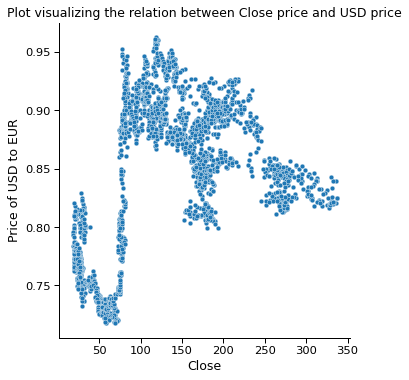

In [103]:
sns.relplot(x="Close", y="Price of USD to EUR", data=df_combined)
plt.title('Plot visualizing the relation between Close price and USD price')
plt.show()

**On this graph we can see that when the USD price is low - below 0.80 the price of the stock is also at its lowest. This demonstrates the relation between the two features.**

Let's now visualize how the corona effect the stock market price.

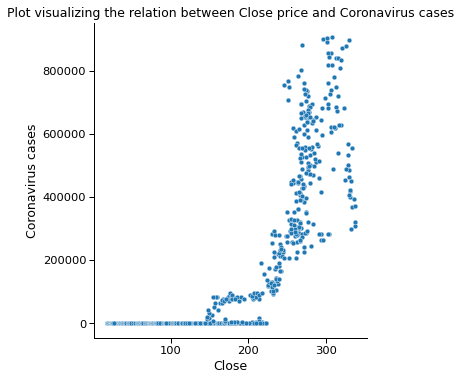

In [108]:
sns.relplot(x="Close", y="Coronavirus cases", data=df_combined)
plt.title('Plot visualizing the relation between Close price and Coronavirus cases')
plt.show()

**Now this graph shows very interesting data. We can tell for sure that when corona appeared the price of the stock was a little above 200(around 220) because the cases were still 0. As soon as corona entered our world and there were a little cases every day the price of the stock has gone back all the way to around 150. This is more than 25% loss because of the corona initially. However as time passed and now there are a lot of new cases every day, the price of the stock is continuing to grow because now corona is part of our lives and we do not thing that much of it. A relation map below will show if still there is a strong relation between the two features.**

Let's also visualize the Relative Strenght index.

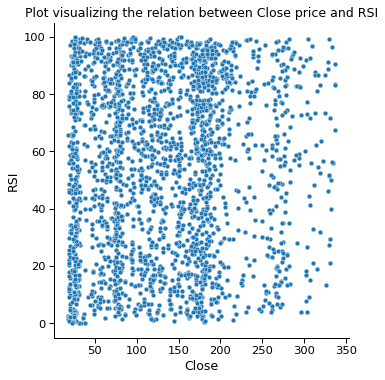

In [109]:
sns.relplot(x="Close", y="RSI", data=df_combined)
plt.title('Plot visualizing the relation between Close price and RSI')
plt.show()

**This plot I was very amazed by. The Relative Strenght Index is part of the fundamental analysis that financial gurus make predictions with. This means that this feature is very important for the stock price. However this plot shows that there is hardly any good relation between the two features.**

Since we are done with the individual relations let's check how the correlation map looks now with all the new features in the dataset.

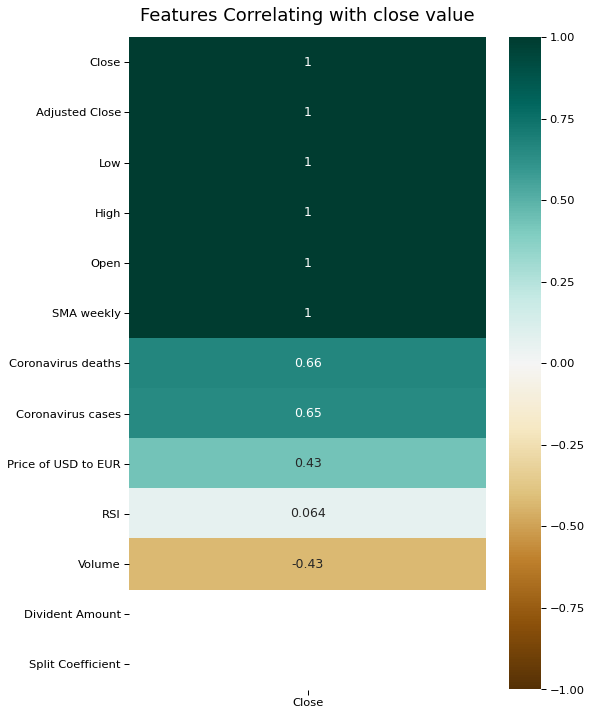

In [114]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_combined.corr()[['Close']].sort_values(by='Close', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with close value', fontdict={'fontsize':18}, pad=16);

It appears that all of the new features, apart from the RSI, have a good correlation with the Stock price value which is a good sign and I can proceed to the next phase.

Before that let's make one final check to make sure that all the types in the data are in the correct format which should be floats.

In [115]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2287 entries, 2012-05-18 to 2021-06-21
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Open                 2287 non-null   float64
 1   High                 2287 non-null   float64
 2   Low                  2287 non-null   float64
 3   Close                2287 non-null   float64
 4   Adjusted Close       2287 non-null   float64
 5   Volume               2287 non-null   float64
 6   Divident Amount      2287 non-null   float64
 7   Split Coefficient    2287 non-null   float64
 8   RSI                  2287 non-null   float64
 9   SMA weekly           2287 non-null   float64
 10  Coronavirus cases    2287 non-null   float64
 11  Coronavirus deaths   2287 non-null   float64
 12  Price of USD to EUR  2287 non-null   float64
dtypes: float64(13)
memory usage: 314.7 KB


They are already floats from the API and since the data is now enriched and missing values are replaced with correct ones the data preparation phase is done.

----

## Data/Model Storage solution

Storage solution and version control are a major part of Machine Learning. To ensure an efficient way of working with data the following tools will be used:
* Git Version Control 
* Data Version Control (DVC)

## Git Version Control

Git is the most commonly used version control system. It allows developers to work simultaneously and efficiently. Apart from that, it also offers the possibility to track changes in the source code with every commit.

## Data Version Control (DVC)

DVC is a tool built ontop of Git that allows for tracking and storing Data. For my project I will not need to store the data because all my data comes from an API so that it is up-to-date with the current stock market prices. However I have integrated DVC to my project just for the practice because in the future when working with big data this will be useful. With DVC the data can be tracked and stored in an effective and efficient manner.  

---
---

# <a id='modeling'>Modeling</a>

**One major drawback when predicting stock market prices is that none of the columns can be used like a feature when making the prediction. The reason for that is because none of the values is known for a future day. This is why it is quite possible that the models below will work good on test data from the past but not so well on forecasting future values. I will try to document the predicted values for every new day and see how the models will perform.**

In [46]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [47]:
scaler = MinMaxScaler(feature_range=(0,1))

In [48]:
scaled_data = scaler.fit_transform(df_prices['Close'].values.reshape(-1,1))

In [49]:
prediction_days = 60

In [50]:
x_train = []
y_train = []

In [51]:
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])
    
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [52]:
#Build the model

model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 1))

model.compile(optimizer = 'adam', loss ='mean_squared_error')
model.fit(x_train, y_train, epochs = 25, batch_size = 32)


Epoch 1/25
69/69 [==============================] - 8s 40ms/step - loss: 0.0395
Epoch 2/25
69/69 [==============================] - 3s 41ms/step - loss: 0.0016
Epoch 3/25
69/69 [==============================] - 3s 40ms/step - loss: 0.0011
Epoch 4/25
69/69 [==============================] - 3s 40ms/step - loss: 0.0012
Epoch 5/25
69/69 [==============================] - 3s 40ms/step - loss: 0.0011
Epoch 6/25
69/69 [==============================] - 3s 40ms/step - loss: 0.0011
Epoch 7/25
69/69 [==============================] - 3s 40ms/step - loss: 0.0012
Epoch 8/25
69/69 [==============================] - 3s 40ms/step - loss: 0.0011
Epoch 9/25
69/69 [==============================] - 3s 40ms/step - loss: 9.4068e-04
Epoch 10/25
69/69 [==============================] - 3s 40ms/step - loss: 8.6578e-04
Epoch 11/25
69/69 [==============================] - 3s 40ms/step - loss: 8.6325e-04
Epoch 12/25
69/69 [==============================] - 3s 41ms/step - loss: 9.1350e-04
Epoch 13/25
69/69 [==

In [53]:
#Test the model accuracy

data = df_prices[:'1-1-2020']
test_data = df_prices['1-1-2020':]
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'],test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

In [54]:
#Make predictions on Test data
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

In [90]:
#Assign predicted values to a new dataframe for a better visualization including the date.
demon = df_prices[df_prices.shape[0] - predicted_prices.shape[0]:]
demon['Predicted'] = predicted_prices

<ipython-input-90-d7cca1ed5194>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demon['Predicted'] = predicted_prices


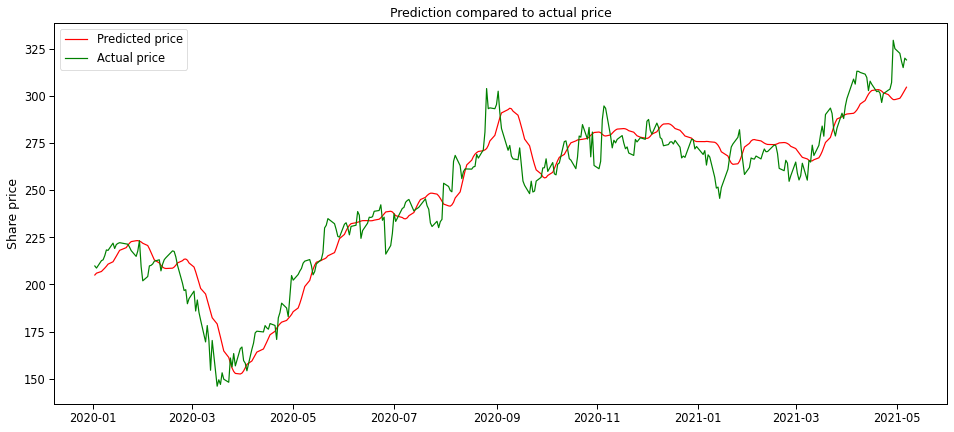

In [91]:
#Plot the predictions
plt.figure(figsize = (16,7))
plt.plot(demon['Predicted'], color = 'red', label='Predicted price')
plt.plot(demon['Close'], color ='green', label='Actual price')
plt.title('Prediction compared to actual price')
plt.ylabel('Share price')
plt.legend()
plt.show()

We can see that in long term the predictions look promising with some exceptions.

---
**Let's put this model to the test for real future values. For this purpose we will predict the value for the next day and see if the forecast will be accurate.**

In [83]:
#Predict next day

real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)

In [84]:
print(f'Prediction for tomorrow is {prediction[0][0]} USD')

Prediction for tomorrow is 305.86700439453125 USD


Prediction for 22/04 was 295.9 - Actual Closing price on this day was 296.5 which is pretty good for now. <br>
Prediction for 23/04 was 289.2 - Actual Closing price on this day was 301.1 <br>
Prediction for 26/04 was 286.1 - Actual Closing price on this day was 303.04<br>
Prediction for 27/04 was 284.2 - Actual Closing price on this day was 303.57<br>


The predictions are sometimes close to the real prices. But as expected the model is not capable of predicting sudden big changes of the price.

---

**Let's now try different model - This time Linear Regression will be used. This might not be the best model for this purpose but I will still try to see if the predictions are accurate**

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
#Create variable to predict 'x' days into the future

future_days = 60

#Copy dataframe into a new one
df_predict = df_prices.copy()
df_predict = df_predict[['Close']]

#Create new column (target) shifted 'x' units/days up
df_predict['Prediction'] = df_predict[['Close']].shift(-future_days)
df_predict.tail()


Close  Prediction
date                          
2021-05-03  322.58         NaN
2021-05-04  318.36         NaN
2021-05-05  315.02         NaN
2021-05-06  320.02         NaN
2021-05-07  319.08         NaN

In [19]:
#Create the feature data set (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df_predict.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 38.2318]
 [ 34.03  ]
 [ 31.    ]
 ...
 [266.58  ]
 [269.45  ]
 [271.87  ]]


In [20]:
#Create the target data set (y) and convert it to a numpy array and get all of the target values except of the last 'x' rows/days
y = np.array(df_predict['Prediction'])[:-future_days]
print(y)

[ 20.38  21.2   19.87 ... 315.02 320.02 319.08]


In [21]:
#Split the data into 75% training 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [22]:
#Create models
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [23]:
#Get the last 'x' rows of the feature data set
x_future = df_predict.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[276.95],
       [278.96],
       [275.  ],
       [271.97],
       [272.94],
       [269.7 ],
       [268.43],
       [276.92],
       [275.59],
       [277.81],
       [276.97],
       [286.55],
       [287.52],
       [281.85],
       [279.7 ],
       [285.58],
       [283.4 ],
       [277.92],
       [277.12],
       [273.55],
       [274.19],
       [275.55],
       [275.67],
       [274.48],
       [276.4 ],
       [272.79],
       [267.09],
       [268.11],
       [267.4 ],
       [277.  ],
       [276.78],
       [271.87],
       [273.16],
       [268.94],
       [270.97],
       [263.31],
       [268.74],
       [267.57],
       [256.84],
       [251.09],
       [251.64],
       [245.64],
       [251.36],
       [261.1 ],
       [267.48],
       [272.87],
       [274.5 ],
       [278.01],
       [282.05],
       [272.14],
       [265.  ],
       [258.33],
       [262.01],
       [267.08],
       [266.65],
       [266.49],
       [268.1 ],
       [266.58],
       [269.45

In [38]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[270.39  270.5   271.87  273.57  302.24  261.56  306.26  265.855 264.31
 254.69  257.62  267.08  259.    286.55  257.64  272.87  278.01  265.74
 264.9   273.88  302.65  264.31  279.28  302.65  269.45  290.11  293.54
 318.36  282.14  278.74  283.02  304.95  288.    294.53  275.    308.91
 306.26  313.09  313.02  312.46  311.54  309.76  302.82  307.82  282.14
 302.24  302.65  301.47  286.55  301.13  303.04  303.57  307.1   329.51
 325.08  322.58  318.36  277.    320.02  304.95 ]
[285.8399659  287.87260996 283.86799777 280.80386269 281.78479043
 278.50828955 277.2239821  285.80962792 284.46464454 286.7096544
 285.86019121 295.54811665 296.52904438 290.79516784 288.62094658
 294.56718891 292.36262968 286.82089363 286.01188106 282.4016625
 283.04887255 284.42419391 284.54554579 283.34213961 285.28376976
 281.63310057 275.86888606 276.90037708 276.18237843 285.89052918
 285.66805073 280.70273612 282.00726888 277.73972761 279.79259699
 272.0463017  277.53747447 276.3542936  265.5034126  259.6

<ipython-input-43-20ca4a77a182>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


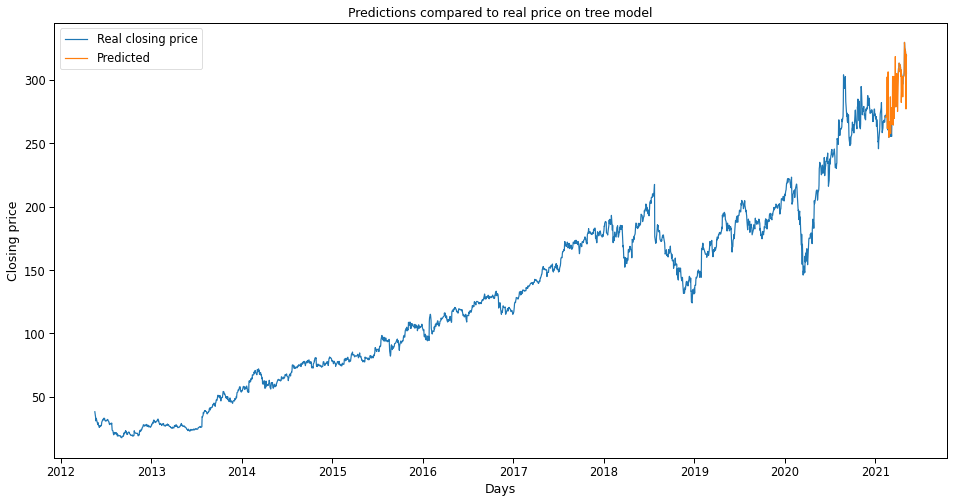

In [43]:
#Visualize decision tree model predictions
predictions = tree_prediction

valid = df_predict[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Predictions compared to real price on tree model')
plt.xlabel('Days')
plt.ylabel('Closing price')
plt.plot(df_predict['Close'])
plt.plot(valid[['Predictions']])
plt.legend(['Real closing price', 'Predicted'])
plt.show()

It look's like it overlaps the real closing price. Let's take a closer look.

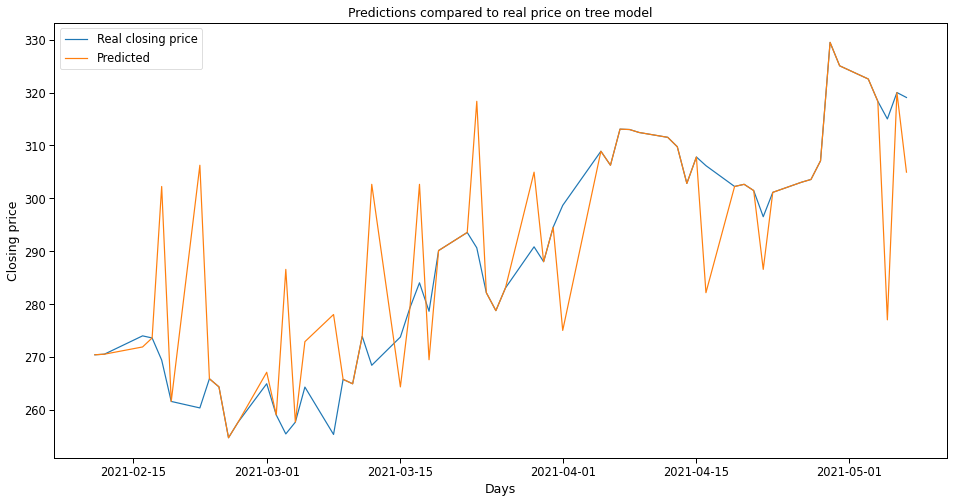

In [44]:
plt.figure(figsize=(16,8))
plt.title('Predictions compared to real price on tree model')
plt.xlabel('Days')
plt.ylabel('Closing price')
plt.plot(df_predict['Close'][X.shape[0]:])
plt.plot(valid[['Predictions']])
plt.legend(['Real closing price', 'Predicted'])
plt.show()

We can see that sometimes the predictions are accurate but overall they do not look very promising. <br>
Let's check on the linear regression model.

<ipython-input-41-06877fafc537>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


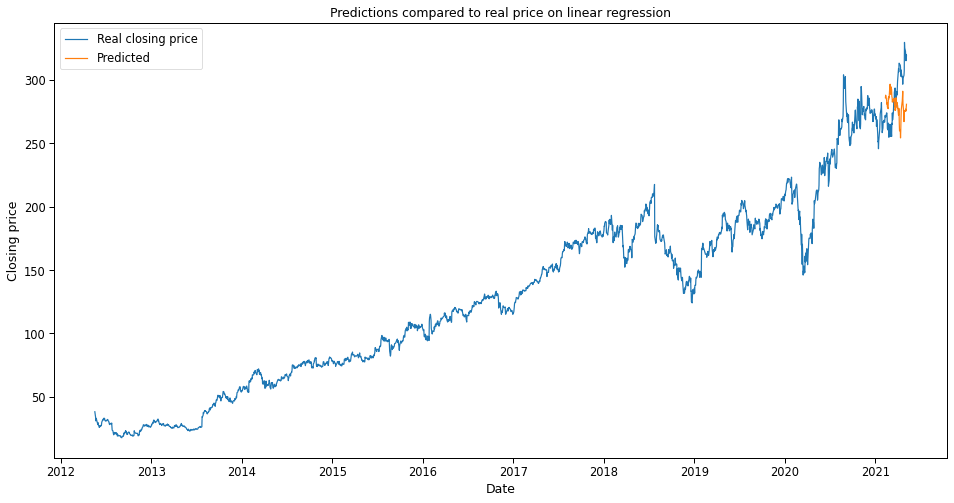

In [41]:
#Visualize linear regression model predictions
predictions = lr_prediction

valid = df_predict[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Predictions compared to real price on linear regression')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.plot(df_predict['Close'])
plt.plot(valid[['Predictions']])
plt.legend(['Real closing price', 'Predicted'])
plt.show()

Here it is safe to say that the predictions are not good at all.

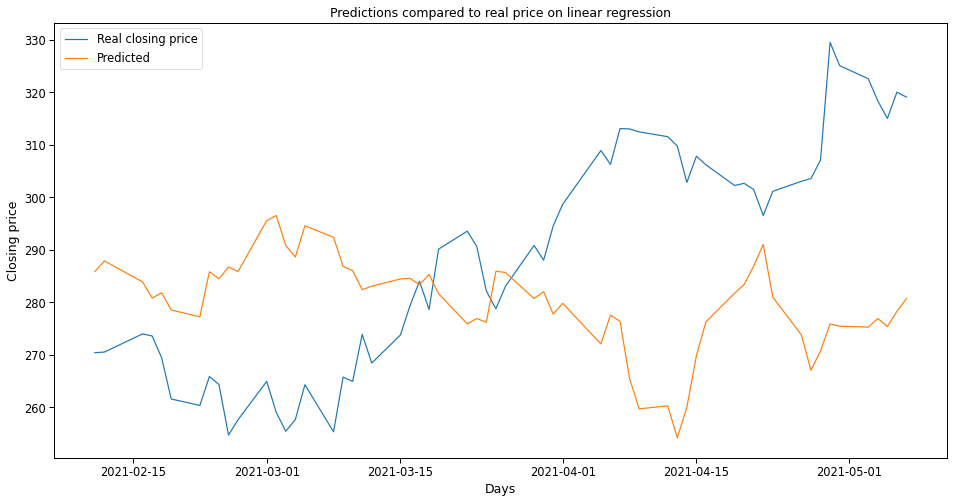

In [42]:
plt.figure(figsize=(16,8))
plt.title('Predictions compared to real price on linear regression')
plt.xlabel('Days')
plt.ylabel('Closing price')
plt.plot(df_predict['Close'][X.shape[0]:])
plt.plot(valid[['Predictions']])
plt.legend(['Real closing price', 'Predicted'])
plt.show()

The linear regression model appears to very inaccurate in comparison to the decision tree model. 

---
# Evaluation

**Let's now evaluate on R squared the tree model and the linear regression model**

In [33]:
ap = np.array(valid['Close'][valid.shape[0]-60:])

correlation_matrix = np.corrcoef(tree_prediction, ap)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(f'The R squared value on the decision tree regressor model is {r_squared}')


The R squared value on the decision tree regressor model is 0.650195723775081


In [32]:
ap = np.array(valid['Close'][valid.shape[0]-60:])

correlation_matrix = np.corrcoef(lr_prediction, ap)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(f'The R squared value on the linear regression model is {r_squared}')

The R squared value on the linear regression model is 0.44893438712455097


As could be seen in the graphs below, the decision tree model is in fact more accurate when it comes to predicting stock prices. <br>

Let's now evaluate the accuracy of the LSTM model.

In [78]:
predicted_copy = predicted_prices
predicted_copy = np.concatenate(predicted_copy, axis=0 )

In [79]:
correlation_matrix = np.corrcoef(predicted_copy, actual_prices)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(f'The R squared value on the LSTM model is {r_squared}')

The R squared value on the LSTM model is 0.91894258926148


Here the accuracy is pretty good on the test data which I mark as success.

---
---

# Conclusion

<br>
**To conclude this project I believe that the LSTM model would be the most suitable to make the most accurate predictions. I have done several researches on this topic and indeed the LSTM model is the most used one for making stock market predictions and in the evaluation above we can see the reason for that.** <br>
**Despite the good accuracy on the test data it is wise to say that in real life the model would most likely perform poorly especially in long term and thus trusting your money into such software might not always be the best decision.**
<br>